<a href="https://colab.research.google.com/github/LauraLBH/RepData_PeerAssessment1/blob/master/Data_Specialisation_Homework_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
import pandas as pd

In [4]:
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

## **Question 1**

>  A pie chart to show the proportion of male to female passengers




In [5]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn

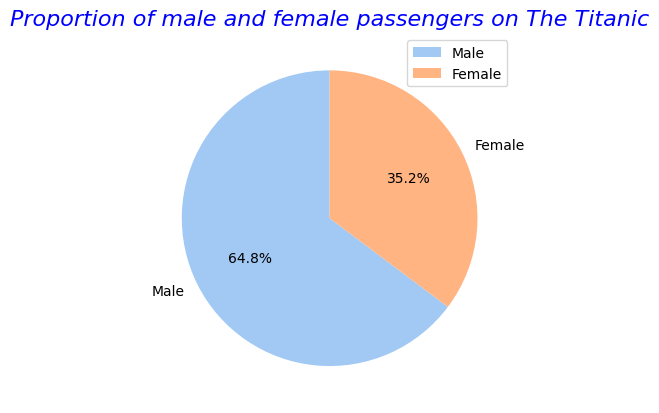

In [7]:
labels = ['Male', 'Female']
gender_split = titanic.sex.value_counts()
palette = sn.color_palette('pastel')
plt.pie(
    gender_split,
    labels=labels,
    colors=palette,
    startangle=90,
    shadow= False,
    autopct='%1.1f%%'
)
plt.title(label = 'Proportion of male and female passengers on The Titanic',
          fontsize = 16, color = 'blue', fontstyle = 'oblique')
plt.legend()
plt.show()

## **Question 2**


> A pie chart to show the proportion of passengers in each class



In [8]:
from pandas.core.base import value_counts
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

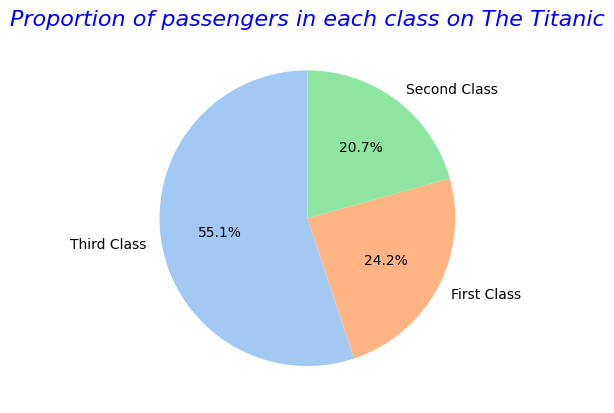

In [9]:
labels = ['Third Class', 'First Class', 'Second Class']
class_split = titanic['class'].value_counts()
cols = sn.color_palette('pastel')
plt.pie(
    class_split,
    labels=labels,
    colors=palette,
    startangle=90,
    shadow= False,
    autopct='%1.1f%%'
)
plt.title(label = 'Proportion of passengers in each class on The Titanic',
          fontsize = 16, color = 'blue', fontstyle = 'oblique')
plt.show()

## **Question 3**

> Explain the relationship between age and fare



In [10]:
titanic.age.info()
titanic_age_fare = titanic[['age', 'fare', 'sex']]

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [11]:
titanic_age_fare.dropna() #dropped the Null values for better representation of the data

,age,fare,sex
0,22.0,7.2500,male
1,38.0,71.2833,female
2,26.0,7.9250,female
3,35.0,53.1000,female
4,35.0,8.0500,male
...,...,...,...
885,39.0,29.1250,female
886,27.0,13.0000,male
887,19.0,30.0000,female
889,26.0,30.0000,male


Text(0, 0.5, 'fare (£)')

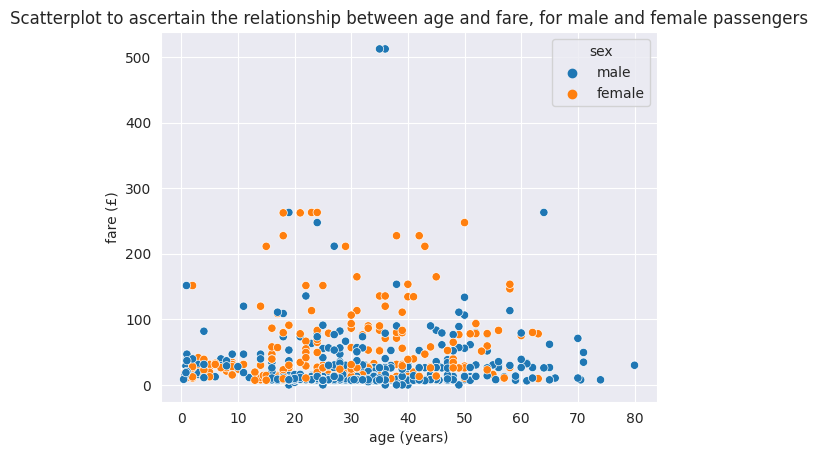

In [112]:
import seaborn as sns
sns.set_style("darkgrid")
sns.scatterplot(data = titanic_age_fare, x = 'age', y = 'fare',
                hue = 'sex').set_title('Scatterplot to ascertain the relationship between age and fare, for male and female passengers')
plt.xlabel('age (years)')
plt.ylabel('fare (£)')

There appears to be no relationship between age and fare when examining the scatterplot; this remains true even when also looking at the proportion of males and females. The majority of fares for all ages remains low, this is because the majority of passengers on the Titanic were third class passengers (55.1% as shown in the previous pie chart) and therefore these passengers were travelling on the lowest price fare.

## **Question 4**

> What is the survival ratio by age, sex and class





Looking at the survival ratios for sex first

In [13]:
titanic_sex_ratio = titanic[['sex','survived']]

In [65]:
survival_ratio_sex = titanic.groupby(['sex','survived']).size().unstack()
survival_ratio_sex


survived,0,1
sex,,
female,81,233
male,468,109


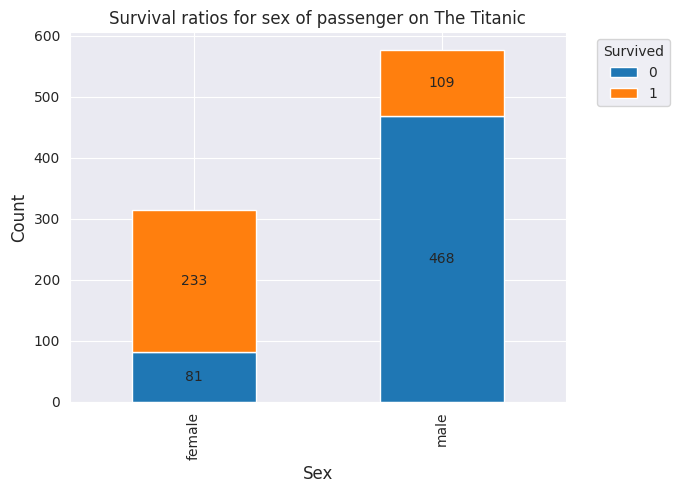

In [92]:
ax = survival_ratio_sex.plot(kind = 'bar', stacked = True,
                             title = "Survival ratios for sex of passenger on The Titanic")
ax.set_ylabel("Count", fontsize=12)
ax.set_xlabel("Sex", fontsize=12)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

ax.legend(title='Survived', bbox_to_anchor=(1.05, 1), loc='upper left')

In [73]:
not_survived = survival_ratio_sex.iloc[:,0]
survived = survival_ratio_sex.iloc[:,1]
survival_ratio_for_sex = survived/not_survived
survival_ratio_for_sex


sex
female    2.876543
male      0.232906
dtype: float64

The bar chart shows the ratio of survived (1) vs not survived (0) - the majority of men did not survive (468 out of 577 did **not** survive, survival ratio = 0.23), however the majority of women did survive (288 out of 314 survived, survival ratio = 2.88)

---



Survival ratio for class

In [77]:
survival_ratio_class = titanic.groupby(['class','survived']).size().unstack()
survival_ratio_class

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


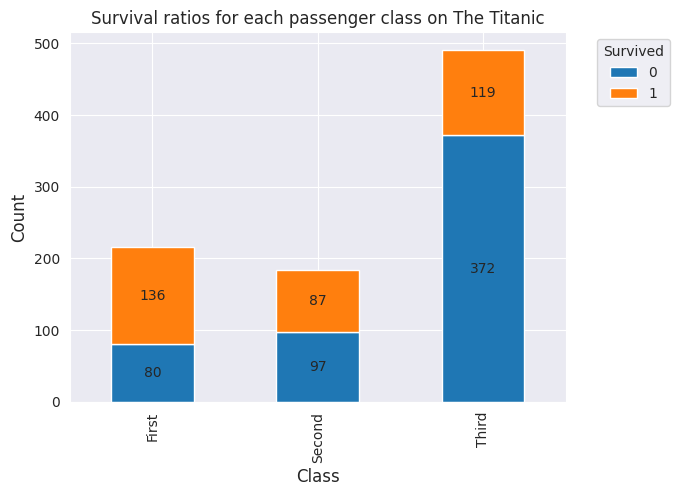

In [91]:
bx = survival_ratio_class.plot(kind = 'bar', stacked = True,
                               title = "Survival ratios for each passenger class on The Titanic",)
bx.set_ylabel("Count", fontsize=12)
bx.set_xlabel("Class", fontsize=12)
for c in bx.containers:
    bx.bar_label(c, label_type='center')

bx.legend(title='Survived', bbox_to_anchor=(1.05, 1), loc='upper left')

In [103]:
not_survived = survival_ratio_class.iloc[:,0]
survived = survival_ratio_class.iloc[:,1]
survival_ratio_for_class = survived/not_survived
survival_ratio_for_class

class
First     1.700000
Second    0.896907
Third     0.319892
dtype: float64

The bar chart and survival ratio table show the ratio of survived (1) vs not survived (0) for passengers in first, second and third class on the ship.
The worst survival ratio was for passengers in third class (out of the 491 third class passengers, only 119 survived = survival ratio of 0.32).
Only passengers from first class had more chance of surviving than dying with a survival ratio of 1.7. Second class passengers were still more likely to die than survive with a survival ratio of 0.90.

---



Survival ratios for age

In [20]:
titanic_age_ratio = titanic[['age','survived']]

In [97]:
titanic_age_ratio = titanic_age_ratio.assign(agegroup=pd.cut(titanic_age_ratio['age'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
        right=False, labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59','60-69', '70-79', '80-89']))

In [98]:
survival_ratio_agegroup = titanic_age_ratio.groupby(['agegroup','survived']).size().unstack()
survival_ratio_agegroup

survived,0,1
agegroup,,
0-9,24,38
10-19,61,41
20-29,143,77
30-39,94,73
40-49,55,34
50-59,28,20
60-69,13,6
70-79,6,0
80-89,0,1


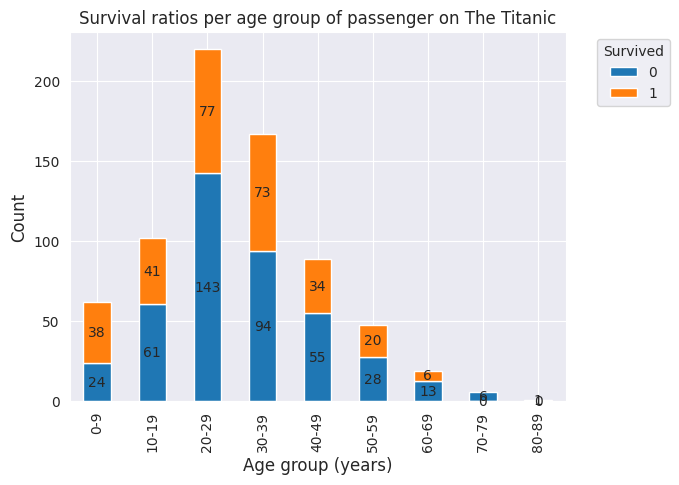

In [111]:
cx = survival_ratio_agegroup.plot(kind = 'bar', stacked = True,
                                  title = "Survival ratios per age group of passenger on The Titanic")
cx.set_ylabel("Count", fontsize=12)
cx.set_xlabel("Age group (years)", fontsize=12)
for c in cx.containers:
    cx.bar_label(c, label_type='center')

cx.legend(title='Survived', bbox_to_anchor=(1.05, 1), loc='upper left')

In [101]:
not_survived = survival_ratio_agegroup.iloc[:,0]
survived = survival_ratio_agegroup.iloc[:,1]
survival_ratio_for_agegroup = survived/not_survived
survival_ratio_for_agegroup

agegroup
0-9      1.583333
10-19    0.672131
20-29    0.538462
30-39    0.776596
40-49    0.618182
50-59    0.714286
60-69    0.461538
70-79    0.000000
80-89         inf
dtype: float64

The bar chart shows the distribution of age groups for the passengers on The Titanic and the ratio of survival for each age group.
The age group with the largest number of passengers was the 20-29 age group, they had a survival ratio of 0.54 which was the third lowest survival ratio after the 70-79 age group (survival ratio = 0 as they all died) and the 60-69 age group (survival ratio = 0.46).
The age group with the highest survival ratio was the 0-9 age group with a survival ratio of 1.58, they were the only age group to have a higher chance of surviving than dying. This high survival ratio was undoubtably due to the rule that women and children boarded lifeboats first.

---

